In [1]:
from carbon import CarbonPair, CarbonSimulatorUI, analytics as al
from carbon import __version__ as cversion, __date__ as cdate
import numpy as np
from matplotlib import pyplot as plt
from collections import namedtuple
print (f"Carbon Version v{cversion} ({cdate})")
print (f"Analytics Version v{al.__version__} ({al.__date__})")

Carbon Version v1.5-beta1 (6/Dec/2022)
Analytics Version v2.0 (30/Nov/2022)


# Carbon Simulation - Demo 3-2

In this demo we look at an **order book**

In [2]:
NUM_POINTS = 50   # number of points on the precise chart

## Setup

In [3]:
Sim = CarbonSimulatorUI(pair="ETH/USDC", verbose=False, raiseonerror=True)
CA = al.Analytics(Sim, verbose=True)
CA

Analytics(sim=CarbonSimulatorUI(<0 orders, 0 trades>, pair='ETH/USDC', mm='exact', xf=True))

In [4]:
maxx = 3000
orders = tuple([
    al.orders_nt("ETH", 100, 2000, maxx),
    al.orders_nt("ETH", 100, 2400, 2500),
    al.orders_nt("ETH", 100, 2500, 2700),
    #al.orders_nt("ETH", 100, 2200, 2600),
    al.orders_nt("USDC", 1000*150, 1500, 500),
    al.orders_nt("USDC", 1100*150, 1200, 1000),
])

In [5]:
for o in orders:
    Sim.add_order(o.tkn, o.amt, o.p_start, o.p_end)
Sim.state()["orders"]

,id,pair,tkn,y_int,y,y_unit,p_start,p_end,p_marg,p_unit,lid
0,0,ETHUSDC,ETH,100.0,100.0,ETH,2000.0,3000.0,2000.0,USDC per ETH,0
1,1,ETHUSDC,ETH,100.0,100.0,ETH,2400.0,2500.0,2400.0,USDC per ETH,1
2,2,ETHUSDC,ETH,100.0,100.0,ETH,2500.0,2700.0,2500.0,USDC per ETH,2
3,3,ETHUSDC,USDC,150000.0,150000.0,USDC,1500.0,500.0,1500.0,USDC per ETH,3
4,4,ETHUSDC,USDC,165000.0,165000.0,USDC,1200.0,1000.0,1200.0,USDC per ETH,4


In [6]:
Sim.liquidity(Sim.ASDF)

y
pair    tkn           
ETHUSDC ETH      300.0
        USDC  315000.0

## Approximate liquidity

In [7]:
prices = al.linspace(400,3000, 500)
ETHUSDC = CarbonPair(tknq="USDC", tknb="ETH")

In [8]:
liq =  al.calc_liquidity_approx(Sim.state()["orderuis"], prices, ETHUSDC, reverse=False)
liqr = al.calc_liquidity_approx(Sim.state()["orderuis"], prices, ETHUSDC, reverse=True)

[calc_liquidity_approx] pair:ETHUSDC ETH USDC
[calc_liquidity_approx] ask:3 bid:2
[calc_liquidity_approx] tkn=ETH
[calc_liquidity_approx] pair:ETHUSDC ETH USDC
[calc_liquidity_approx] ask:3 bid:2
[calc_liquidity_approx] tkn=USDC


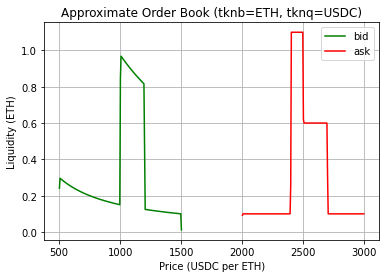

In [9]:
al.plot_approx_orderbook_chart(liq)

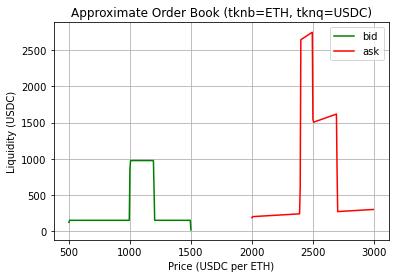

In [10]:
al.plot_approx_orderbook_chart(liqr)

## AMM sells base token (ask side)

In [11]:
max_liquidity_eth = Sim.liquidity()["ETHUSDC"]["ETH"]
print(f'sim liquidity {Sim.liquidity()["ETHUSDC"]["ETH"]} ETH')
print("max liquidity", max_liquidity_eth)
src_amounts_eth = al.linspace0(max_liquidity_eth*1.1, NUM_POINTS)

sim liquidity 300.0 ETH
max liquidity 300.0


In [12]:
CA.simulate_trades(60, CA.ASK)

[simulate_trades] trading src=60 trg=134140.495817 [pair=ETH/USDC, tknb=ETH amm_sells_tknb]


134140.495817

In [13]:
CA.simulate_trades(70, CA.ASK)

[simulate_trades] trading src=70 trg=158295.64718 [pair=ETH/USDC, tknb=ETH amm_sells_tknb]


158295.64718

In [14]:
trg_amounts = al.vec([
    CA.simulate_trades(size, CA.ASK) for size in src_amounts_eth
])

[simulate_trades] trading src=0.0001 trg=0.2 [pair=ETH/USDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=6.6 trg=13361.828116 [pair=ETH/USDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=13.2 trg=27055.346821 [pair=ETH/USDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=19.799999999999997 trg=41093.062042 [pair=ETH/USDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=26.4 trg=55488.116396 [pair=ETH/USDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=33.0 trg=70254.330235 [pair=ETH/USDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=39.599999999999994 trg=85406.245901 [pair=ETH/USDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=46.199999999999996 trg=100959.175497 [pair=ETH/USDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=52.8 trg=116803.758768 [pair=ETH/USDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=59.4 trg=132694.013335 [pair=ETH/USDC, tknb=ETH amm_sells_tknb]
[simulate_trades] trading src=66.

In [15]:
OB = al.OrderBook(src_amounts_eth, trg_amounts, "ETH", "USDC")
print(OB.explain())

This is the ASK book.
Source token = ETH, target token = USDC.
AMM sells ETH for USDC.
Base token = ETH, quote token = USDC.
Prices are quoted in USDC per ETH.
Order book amounts are quoted in USDC.


In [16]:
OB

OrderBook(<src=ETH trg=USDC bidask=ASK_amm_sells_src_tkn rev=False; 45 records>)

In [17]:
trg_amounts

0          0.200000
1      13361.828116
2      27055.346821
3      41093.062042
4      55488.116396
5      70254.330235
6      85406.245901
7     100959.175497
8     116803.758768
9     132694.013335
10    148622.907254
11    164590.581634
12    180597.178269
13    196642.839646
14    212727.708947
15    228851.930059
16    245015.647568
17    261219.006773
18    277462.153685
19    293745.235035
20    310068.398274
21    326431.791581
22    342835.563866
23    359279.864774
24    375765.092525
25    392309.053961
26    408922.955570
27    425607.241802
28    442362.360883
29    459188.764852
30    476086.909602
31    493057.254923
32    510100.264542
33    527216.406165
34    544406.151522
35    561669.976407
36    579008.360726
37    596421.788536
38    613910.748097
39    631475.731912
40    649117.236775
41    666835.763817
42    684639.665726
43    702812.870464
44    721513.820982
45    740765.844414
46              NaN
47              NaN
48              NaN
49              NaN


'plotted tokens received against trade size (740,765)'

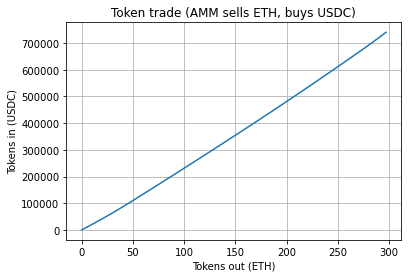

In [18]:
OB.plot_token_amount_chart()

When SELLING ETH, the AMM sells more and more expensively the more ETH it sells

'plotted marginal and effective prices against trade size'

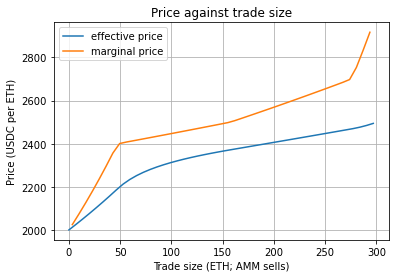

In [19]:
OB.plot_price_chart()

When SELLING ETH, the AMM pays more (in ETH terms) for the first units of USD received than for the later ones

'plotted order book (724,458)'

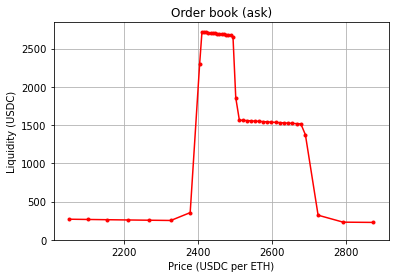

In [20]:
OB.plot_orderbook_chart()

## AMM sells base token (bid side)

In [21]:
max_liquidity_usdc = Sim.liquidity()["ETHUSDC"]["USDC"]
print(f'sim liquidity {Sim.liquidity()["ETHUSDC"]["USDC"]} USDC')
print("max liquidity", max_liquidity_usdc)
src_amounts_eth2 = al.linspace0(max_liquidity_usdc/1000*1.1, NUM_POINTS)

sim liquidity 315000.0 USDC
max liquidity 315000.0


In [22]:
trg_amounts = al.vec([
    CA.simulate_trades(size, CA.BID) for size in src_amounts_eth2
])

[simulate_trades] trading src=0.0001 trg=0.15 [pair=ETH/USDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=6.93 trg=10099.198257 [pair=ETH/USDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=13.86 trg=19639.530954 [pair=ETH/USDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=20.79 trg=28666.13854 [pair=ETH/USDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=27.72 trg=37219.427503 [pair=ETH/USDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=34.65 trg=45506.29547 [pair=ETH/USDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=41.58 trg=53731.124253 [pair=ETH/USDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=48.51 trg=61894.771076 [pair=ETH/USDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=55.44 trg=69997.916082 [pair=ETH/USDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=62.37 trg=78041.229365 [pair=ETH/USDC, tknb=ETH amm_buys_tknb]
[simulate_trades] trading src=69.3 trg=86025.371164 [pair=ETH/USDC, tknb=ETH amm

In [23]:
OB2 = al.OrderBook(src_amounts_eth2, trg_amounts, "ETH", "USDC", bidask=al.OrderBook.BID)
print(OB2.explain())

This is the BID book.
Source token = ETH, target token = USDC.
AMM buys ETH for USDC.
Base token = ETH, quote token = USDC.
Prices are quoted in USDC per ETH.
Order book amounts are quoted in USDC.


'plotted tokens received against trade size (312,444)'

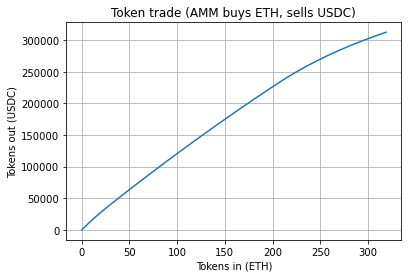

In [24]:
OB2.plot_token_amount_chart()

'plotted marginal and effective prices against trade size'

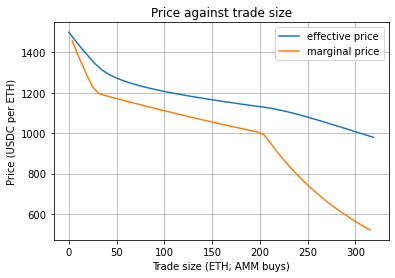

In [25]:
OB2.plot_price_chart()

'plotted order book (305,587)'

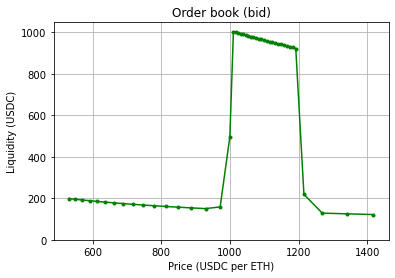

In [26]:
OB2.plot_orderbook_chart()

## Combined

Note: the liquidity is USDC liquidity, not ETH liquidity. This makes the numbers somewhat harder to verify. However -- this means that liquidity can be compared across different pairs that are using the same quote token.

'plotted order book (724,458)'

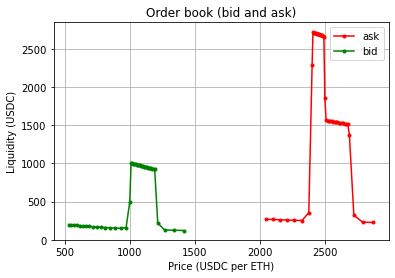

In [27]:
OB.plot_orderbook_chart(otherob=OB2)

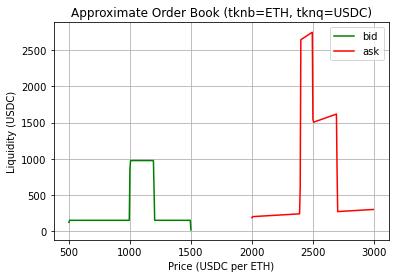

In [28]:
al.plot_approx_orderbook_chart(liqr)

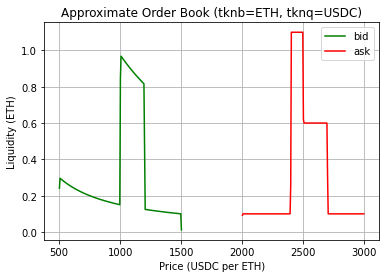

In [29]:
al.plot_approx_orderbook_chart(liq)